# Générer et lire un fichier texte


Les deux encarts ci-dessous [3] et [13] écrivent et lisent une fonction potentiel de la forme $\frac{\omega^2}{2}x^2$.
La difficulté en écriture est que la fonction "write" ne permet pas facilement une récupération du vecteur des données. On a utilisé la fonction print à la place.

Moyennant cet artifice, la fonction np.loadtxt() extrait les données sous forme d'une matrice de nombres.

In [3]:
from pylab import *
import numpy as np


l=10
Nn=500
omeg = 25.
xp = np.linspace(-l, l, Nn)

# définition du potentiel quadratique
Pot = (omeg**2/2)*xp**2
V=str(Pot)


fichier = open("data.txt", "w")
for i in range(Nn):
    print(xp[i], Pot[i],file=fichier)
fichier.close()



In [13]:
from pylab import *
import numpy as np

with open ("data.txt", "r") as fichier: # ouverture du fichier en mode lecture

    fichier = open("data.txt", "r")
data = np.loadtxt(fichier)

xpread = data[:,0]
potread = data[:,1]

#print(xpread)
#print(potread)






## Gestion et ouverture des fichiers potentiels de  $H^+$
Ouverture des fichiers pec_sigmag.txt, pec_sigmau.txt et lecture.
Ces fichiers donnent les potentiels de $H^+$ et $H^-$ lorsque les protons sont à des distances variables l'un de l'autre.
Création de deux fonctions de potentiel interpolant la grille initiale, et l'indexant de 1à 5.
Tracé des courbes

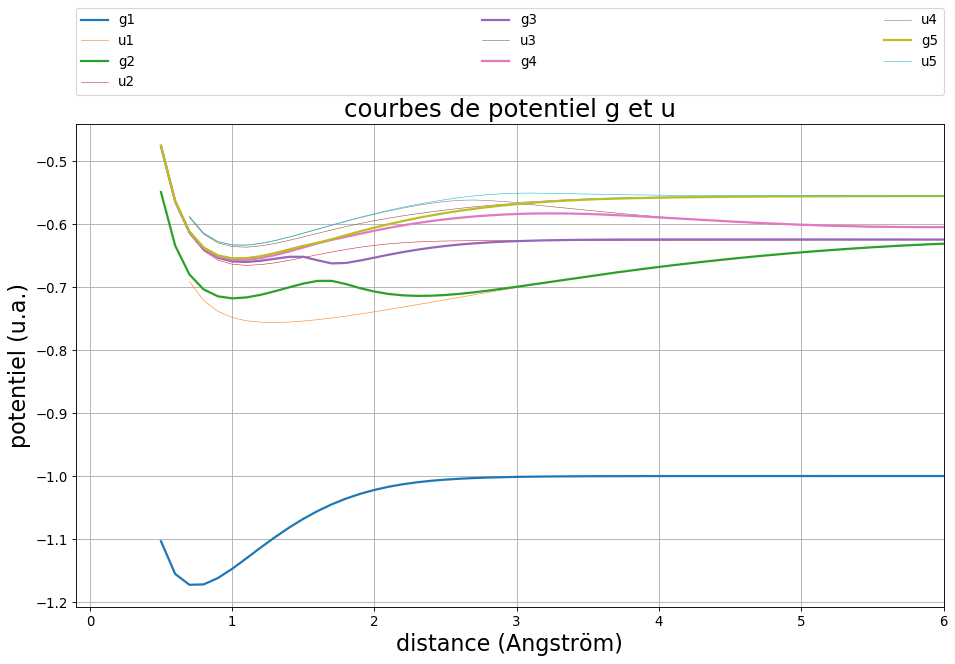

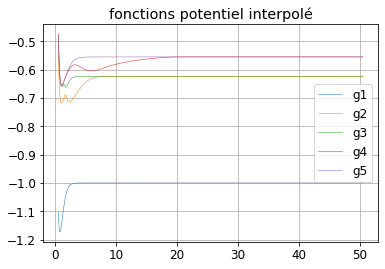

In [11]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pec_sigmag.txt", "r") as fichierg: # ouverture du fichier pec_sigmag.txt en mode lecture
    fichierg = open("pec_sigmag.txt", "r")
data_g = np.loadtxt(fichierg)
xg_read = data_g[:,0]


with open ("pec_sigmau.txt", "r") as fichieru: # ouverture du fichier pec_sigmau.txt en mode lecture
    fichieru = open("pec_sigmau.txt", "r")
data_u = np.loadtxt(fichieru)
xu_read = data_u[:,0]

#########################################################################
# création des fonctions Vgi(x) et Vui(x) qui sont inexées et interpolent les potentiels Vgi et Vui


g1=interp1d(xg_read, data_g[:,1], kind='cubic')
g2=interp1d(xg_read, data_g[:,2], kind='cubic')
g3=interp1d(xg_read, data_g[:,3], kind='cubic')
g4=interp1d(xg_read, data_g[:,4], kind='cubic')
g5=interp1d(xg_read, data_g[:,5], kind='cubic')


Vg = [g1,g2,g3,g4,g5]


g6=interp1d(xu_read, data_u[:,1], kind='cubic')
g7=interp1d(xu_read, data_u[:,2], kind='cubic')
g8=interp1d(xu_read, data_u[:,3], kind='cubic')
g9=interp1d(xu_read, data_u[:,4], kind='cubic')
g10=interp1d(xu_read, data_u[:,5], kind='cubic')

Vu = [g6,g7,g8,g9,g10]

#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
rcParams["axes.grid"] = True
xlabel("distance (Angström)")
ylabel("potentiel (u.a.)")
plt.xlim(-0.1,6)

for ip in range(1,6):
    plt.plot(data_g[:,0], data_g[:,ip],linewidth=2.0, label="g%d"%(ip,))
    plt.plot(data_u[:,0], data_u[:,ip],linewidth=0.5, label="u%d"%(ip,))


plt.title ("courbes de potentiel g et u", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)

plt.show()


plt.title ("fonctions potentiel interpolé")
for ip in range(0,5):
        jp=ip+1
        plt.plot(xg_read, Vg[ip](xg_read), linewidth=0.5, label="g%d"%(jp,))


    
plt.legend(loc='best', frameon= True)
plt.show()



Utilisation de leapfrog sur une fonction potentiel (état fondamental).

488
489
[-1.11022302e-13  3.60822483e-12 -8.38899505e-08  6.90632551e-08
  6.04694073e-09]
3.6082248300317588e-12


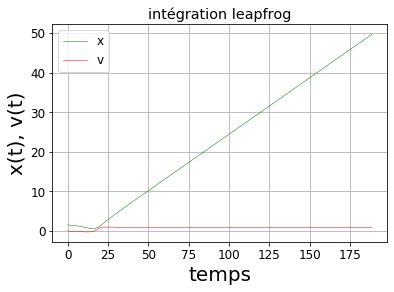

In [8]:

print(len(xg_read))
print(len(xu_read))

x0=1.5
v0=0.
Mm = 300

h=0.0001

i=0
omeg=zeros(5)
for i in range(0,5):
    d=(Vg[i](x0+h)-Vg[i](x0))/h
    omeg[i]=d



###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z):
        l=50
        N=50
        k=0.001
        h=k*2*l/N
        pot=zeros(5)
        for i in range(0,5):
            pot[i]=(Vg[i](z+h)-Vg[i](z))/h
        return pot

    
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def resoudre(x0,v0, Mm):
########################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm

    omeg=0.1 # valeur typique 
    tps=3*2*3.141596/omeg #temps caractéristique posé égal à 3 fois la période
    tp=np.linspace(0,tps,Mm)
    dtp = tp[1] - tp[0]
########################
# Initialisation à 0 des variables, et Conditions initiales
    x = zeros(100)
    v = zeros(100)
    x[0] = x0
    v[0] = v0
    
########################
# Intégration "leapfrog"
    wx= derivpot(x[0])
    k0=wx[0]
    for i in range(0,99):
        v[i + 1] = v[i] - dtp*k0
        x[i + 1] = x[i] + dtp*v[i + 1]
        wx=derivpot(x[i])
        k0=wx[1]
    print(wx)
    print (k0)
        
    return x,v
 


x,v = resoudre(x0,v0,Mm)
tps=3*2*3.141596/0.1
tp=np.linspace(0,tps,100)



###############################################################################
# représentation graphique leapfrog
rcParams["axes.grid"] = True
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 20
figure()
plt.plot(tp,x,'g',linewidth=0.5, label='x')
plt.plot(tp,v,'r',linewidth=0.5, label='v')
xlabel("temps")
ylabel("x(t), v(t)")
plt.title ("intégration leapfrog")
plt.legend(loc='best', frameon= True)

###############################################################################
show()
###############################################################################


